In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import json

In [2]:
data = json.load(open("new_gamma.json","r"))

In [3]:
list(data.keys())

[u'connectivity check time',
 u'dijkstra',
 u'find and enlarge',
 u'iteration init',
 u'current level fac count',
 u'fcla initialization',
 u'relative gain',
 u'greedy set cover time',
 u'result final calculation time',
 u'facilities left after termination',
 u'objective',
 u'number of facilities',
 u'left count',
 u'total covered final',
 u'set cover check time',
 u'Created',
 u'capacity of facilities',
 u'prematching time',
 u'bipartite graph size',
 u'reading file',
 u'increase capacity time',
 u'tree set cover time',
 u'greedy deheap iterations',
 u'augment flow',
 u'make new edge',
 u'proceedLevelType',
 u'total time',
 u'matching count',
 u'building independent set',
 u'lack facility allocation time',
 u'number of iterations',
 u'brute-force copying',
 u'runtime',
 u'update potentials',
 u'lambda']

In [4]:
dijkstra = data['dijkstra']
dijk_total = sum(dijkstra)
dijk_total

0.04335800000000134

In [5]:
setcov = data['set cover check time']
setcov_tot = sum(setcov)
setcov_tot

2.197861000000001

In [6]:
inc_cap = data['increase capacity time']
inc_cap_tot = sum(inc_cap)
inc_cap_tot

0.173611

In [7]:
fae = data['find and enlarge']
fae_tot = sum(fae)
fae_tot

0.09100700000000005

In [8]:
mne = data['make new edge']
mne_tot = sum(mne)
mne_tot

0.02234400000000013

In [9]:
copying = sum(data['brute-force copying'])

In [10]:
aug_tot = sum(data['augment flow'])

In [11]:
# for set cover
plotdata = {'Total WMA time':data['runtime'],
            'Total execution time':data['total time'],
            "Reading file":data['reading file'],
            "Initialization":data['fcla initialization'],
            'lack facility allocation time': data['lack facility allocation time'],
            'Set Cover time': setcov_tot,
            'Set Cover Copying': copying,
            'Matching': inc_cap_tot + data['prematching time'],
            'Other': data['runtime'] - data['lack facility allocation time'] - 
            setcov_tot - inc_cap_tot + data['prematching time']}
df = pd.DataFrame(plotdata,index=range(1))

In [12]:
df = df.T
df.reset_index(level=0, inplace=True)
df = df.rename(columns={0:"time"})

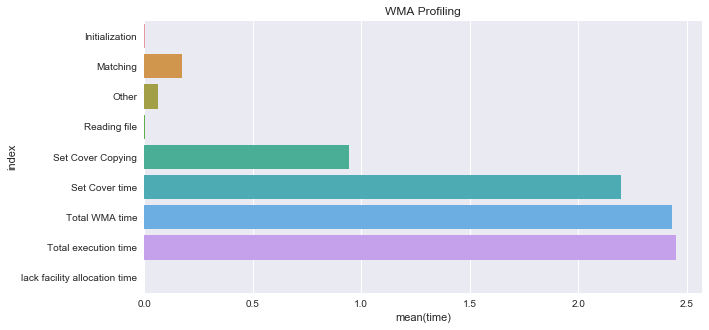

In [13]:
f, ax = plt.subplots(figsize=(10, 5))
sb.barplot(x="time", y="index",data=df)
plt.title("WMA Profiling")

## Iteration analysis

In [251]:
list(data.keys())

[u'connectivity check time',
 u'dijkstra',
 u'find and enlarge',
 u'iteration init',
 u'current level fac count',
 u'fcla initialization',
 u'relative gain',
 u'greedy set cover time',
 u'result final calculation time',
 u'facilities left after termination',
 u'objective',
 u'number of facilities',
 u'left count',
 u'total covered final',
 u'set cover check time',
 u'Created',
 u'capacity of facilities',
 u'prematching time',
 u'bipartite graph size',
 u'reading file',
 u'increase capacity time',
 u'tree set cover time',
 u'greedy deheap iterations',
 u'augment flow',
 u'make new edge',
 u'proceedLevelType',
 u'total time',
 u'matching count',
 u'building independent set',
 u'lack facility allocation time',
 u'number of iterations',
 u'brute-force copying',
 u'runtime',
 u'update potentials',
 u'lambda']

In [252]:
# f, ax = plt.subplots(figsize=(18, 4))
# plt.plot(data['gamma'])

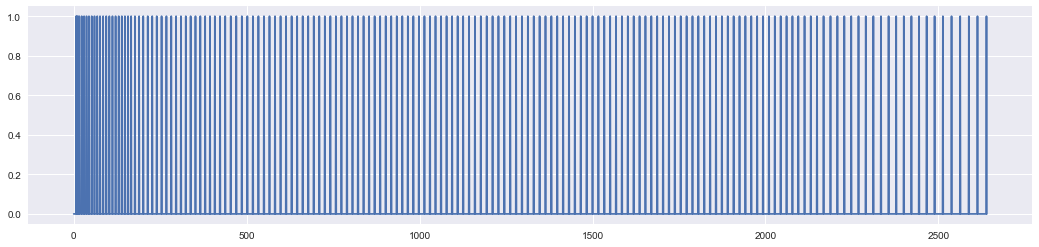

In [253]:
f, ax = plt.subplots(figsize=(18, 4))
plt.plot(data['proceedLevelType'])

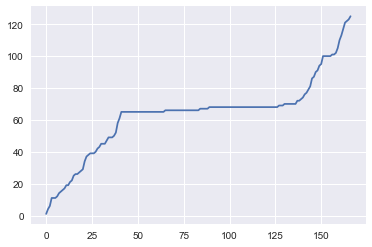

In [254]:
plt.plot(data['current level fac count'])

In [255]:
# f, ax = plt.subplots(figsize=(18, 4))
# plt.plot(data['gamma improvement'])

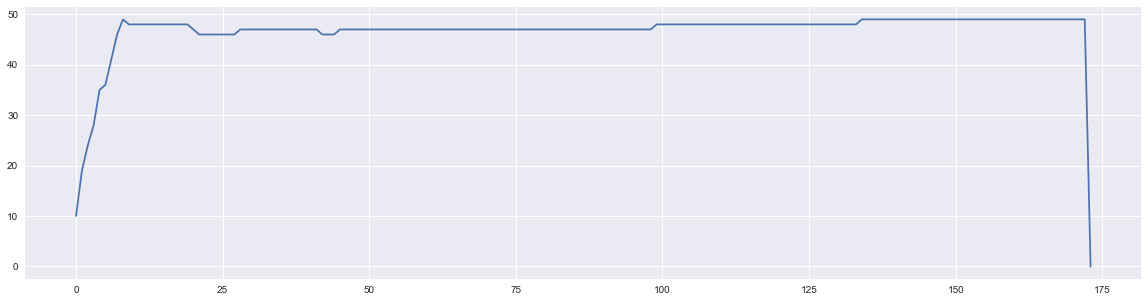

In [256]:
f, ax = plt.subplots(figsize=(20, 5))
plt.plot(data['total covered final'])
# plt.plot(data['gamma'])

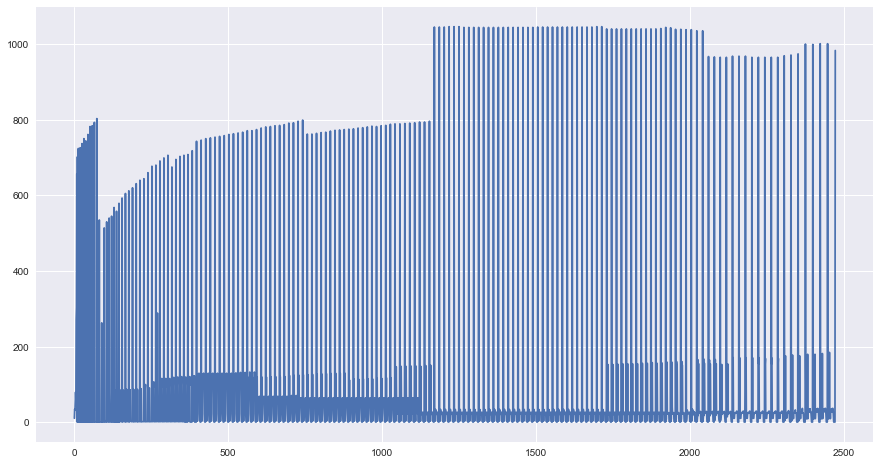

In [14]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['greedy deheap iterations'])
#this is how much to change heap structure.


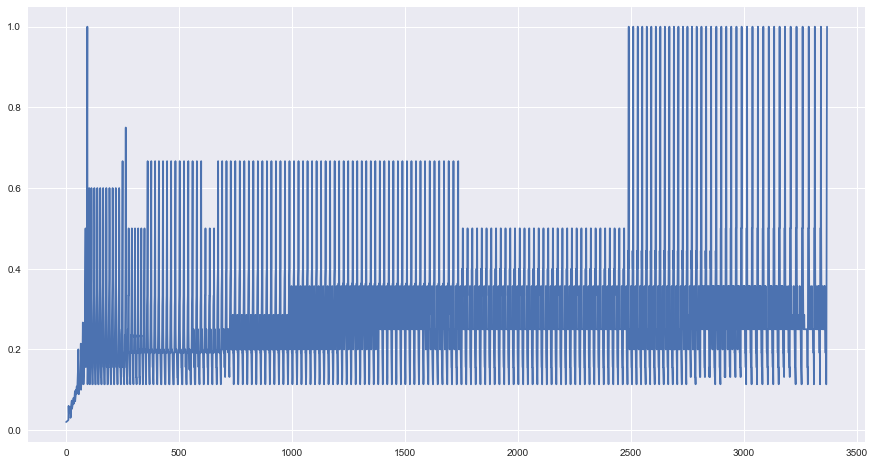

In [258]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['relative gain'])

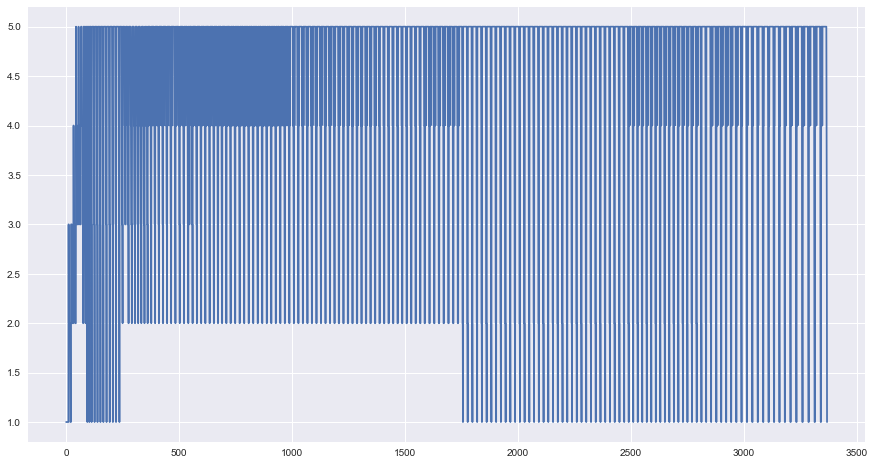

In [259]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['matching count'])

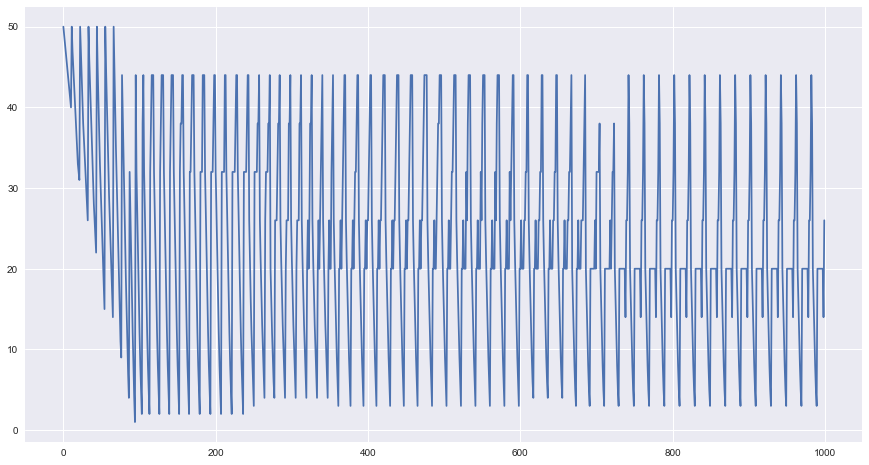

In [16]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(data['left count'][0:1000])